In [4]:
import os
import cv2
import numpy as numpy
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline


In [5]:
def download_and_unzip(url, save_path):
    print('Downloading assets')
    urlretrieve(url, save_path)

    try:
        with ZipFile(save_path) as z:
            z.extractall(os.path.split(save_path)[0])
        print("Done")
    except Exception as e:
        print('\n Invalid file', e)    

In [6]:


URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), 'opencv_bootcamp_assets_NB2.zip')
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

Done


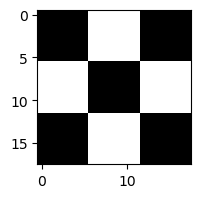

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [20]:
cb_img = cv2.imread('checkerboard_18x18.png',0)
plt.figure(figsize=[10,2])
plt.imshow(cb_img, cmap='gray');plt.show()
print(cb_img,'\n', cb_img.shape)

By default, plt.imshow() uses a colormap to display images, often resulting to a colored image.
cmap = 'gray' forces the display to use grayscale

Plt.imshow() just prepares the image for display but plt.show() does the actual display.

print(cb_img.shape) prints dimensions of matrix, height x width eg 18 by 18

Now that we have seen the matrix is 18rows by 18 columns, we can print individual pixels.
`matrix[row,column]`

Note that matrix is Zero indexed
we have 18 columns but print(cb_img[1,6]) gives 255.
255 is 7th place mathematically but 6th place indexwise

In [23]:
print(cb_img[0,0])
print(cb_img[1,6])

0
255


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

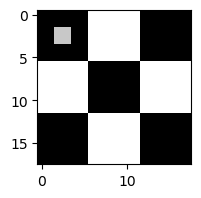

In [29]:
'''
Modifying individual image pixels
'''
cb_img_copy =  cb_img.copy()
cb_img_copy[2,2] = 200
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 200
cb_img_copy[3,3] = 200
print(cb_img_copy)
plt.figure(figsize=[10,2])
plt.imshow(cb_img_copy, cmap='gray');plt.show()


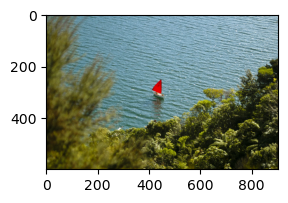

In [34]:
'''
Cropping Images
'''
New_Zealand_BGR = cv2.imread('New_Zealand_Boat.jpg', 1)
New_Zealand_RBG = New_Zealand_BGR[:,:,::-1]
plt.figure(figsize=[10,2])
plt.imshow(New_Zealand_RBG);plt.show()

Format: img[y_start:y_end, x_start:x_end]

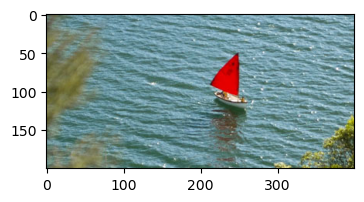

In [35]:
cropped_New_Zealand = New_Zealand_RBG[200:400, 200:600]
plt.figure(figsize=[10,2])
plt.imshow(cropped_New_Zealand);plt.show()

#### Resizing Images
1. `Resize` 
2. Size and type are derived from the `src`, `dsize`, `fx` and `fy`
##### Syntax

dst = `resize( src, dsize[, dst[, fx[, fy[, interpolation]]]])`

dst either has size from dsize(if dsize > zero) or size from src.size(), fx and fy.
1. The type of src[`input image`] and dst[`output image`] is the same
2. fx and fy are optional arguments
3. fx - scale factor along x axis
4. fy - scale factor along y axis
5. Interpolation - controls how OpenCV calculates pixel values when resizing an image, especially when the new size differs from the original (either larger or smaller). It determines the method used to estimate pixel colors and positions.


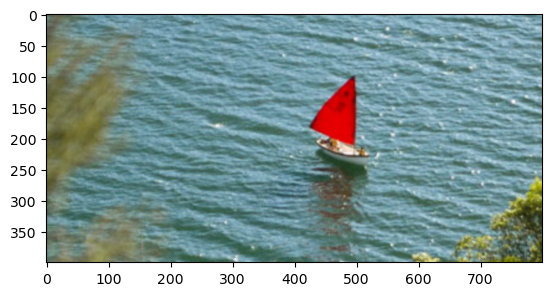

In [36]:
'''
Method 1: Specifying scale factor using fx and fy
'''
resize_cropped_image = cv2.resize(cropped_New_Zealand, None, fx=2, fy=2)
plt.imshow(resize_cropped_image);plt.show()


Note that initially, cropped image axis' was 150 by 300(and something) but the resized image is 300 by 600(and sth). 
The scale factor was 2x of each axis

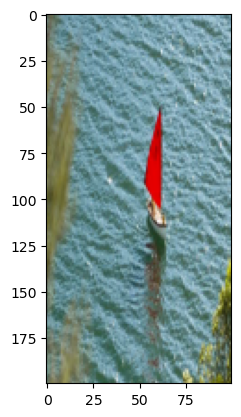

In [39]:
'''
Method 2: Specifying output size
'''
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resize_cropped_image  = cv2.resize(cropped_New_Zealand, dsize = dim, interpolation= cv2.INTER_AREA)
plt.imshow(resize_cropped_image);plt.show()



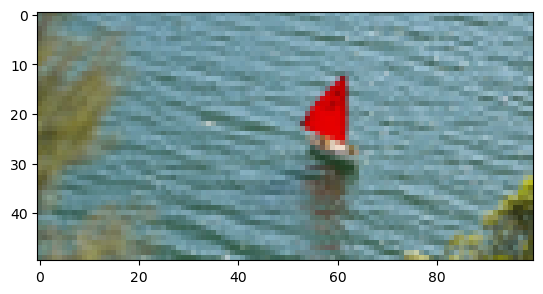

In [40]:
'''
Resize while maintaining aspect ratio
'''
desired_width = 100
current_height = cropped_New_Zealand.shape[0]
current_width = cropped_New_Zealand.shape[1]

aspect_ratio = desired_width / current_width

desired_height = int(current_height * aspect_ratio)

dim = (desired_width, desired_height)
resize_cropped_image = cv2.resize(cropped_New_Zealand, dsize = dim, interpolation=cv2.INTER_AREA)
plt.imshow(resize_cropped_image);plt.show()

cropped_New_Zealnd.shape[1] - gets the current width of the image
.shape returns a tuple(height, width) hence 1 -> width.

scaling factor = desired_width / current_width

int() - Pixels must be integers

In [41]:
resize_cropped_image = cv2.resize(cropped_New_Zealand, None, fx=2, fy=2)
resize_cropped_image_bgr = resize_cropped_image[:,:,::-1]
cv2.imwrite('resize_cropped_image.jpg', resize_cropped_image_bgr)

True

In [42]:
cropped_New_Zealand_Bgr = cropped_New_Zealand[:,:,::-1]
cv2.imwrite('cropped_New_Zealand.jpg', cropped_New_Zealand_Bgr)

True

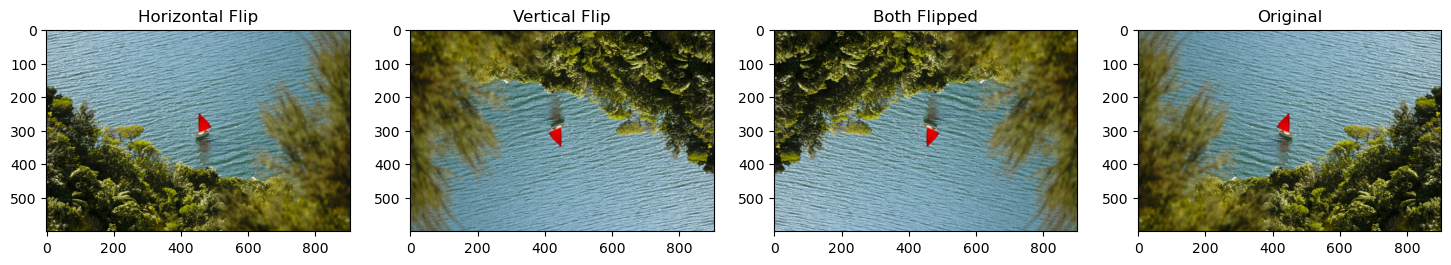

In [57]:
'''
FLip()
'''
flipped_horizontal = cv2.flip(New_Zealand_RBG, 1)
flipped_vertical = cv2.flip(New_Zealand_RBG, 0)
flipped_vertical_and_horizontal = cv2.flip(New_Zealand_RBG, -1)

plt.figure(figsize=[18,5])

plt.subplot(141);plt.imshow(flipped_horizontal);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(flipped_vertical);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(flipped_vertical_and_horizontal);plt.title("Both Flipped")
plt.subplot(144);plt.imshow(New_Zealand_RBG);plt.title("Original")
plt.show()

#### NB
1. We crop images via array slicing eg array[1:4] or array [-3: ] 